In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
tragitti = pd.read_csv('csv/alldata.csv', index_col=False)
tragitti = tragitti[(tragitti['Car'] != 0) & (tragitti['FDistance'] != 0)]

In [2]:
pre_lock_condition = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_condition = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
print(len(tragitti[pre_lock_condition]), len(tragitti[post_lock_condition]))

(8347, 60083)


In [3]:
tragitti = tragitti[pre_lock_condition]

In [4]:
# Velocita' media durante il giorno
def vmedia_giorno(tragitti, mezzo):
    ore = range(7, 24)
    media_giorno = []
    for ora in ore:
        tragitti_fascia_oraria = tragitti[tragitti['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria['FDistance'] * 60.) / tragitti_fascia_oraria[mezzo]
        media_giorno.append(velocita_media_oraria.mean())
    return media_giorno

lst = [
    vmedia_giorno(tragitti[tragitti['FDistance'].between(2., 4.)], 'Car'),
    vmedia_giorno(tragitti[tragitti['FDistance'].between(4., 6.)], 'Car'),
    vmedia_giorno(tragitti[tragitti['FDistance'].between(6., 12.)], 'Car')]

array = np.array(lst).T # transpose

confronto_vmedie_lunghi_corti = \
    pd.DataFrame(array, index=range(7,24), columns=['da 2 a 4 km', 'da 4 a 6 km', 'da 6 a 11 km']).round(decimals=1)
confronto_vmedie_lunghi_corti

,da 2 a 4 km,da 4 a 6 km,da 6 a 11 km
7,17.6,18.3,19.9
8,15.1,16.2,17.1
9,15.6,17.3,18.1
10,15.9,17.0,18.7
11,15.7,17.9,19.1
12,16.6,18.0,20.6
13,17.4,18.6,20.0
14,17.0,18.4,20.2
15,17.1,18.5,19.0
16,16.5,17.7,18.8


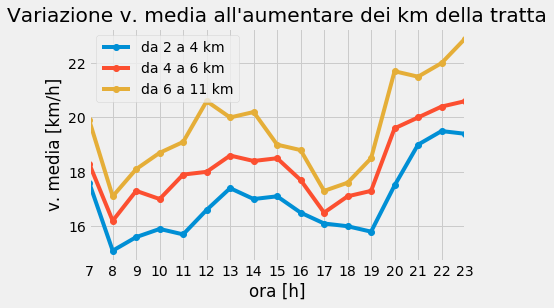

In [5]:
confronto_vmedie_lunghi_corti.plot(marker='o')
plt.xlabel('ora [h]')
plt.ylabel('v. media [km/h]')
plt.title('Variazione v. media all\'aumentare dei km della tratta')
plt.xticks(range(7,24,1))
plt.show()